<a href="https://colab.research.google.com/github/ksuaray/Suaray25/blob/main/Teaching%20Demo/LectureNotes/Canada_Employment_Insurance_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

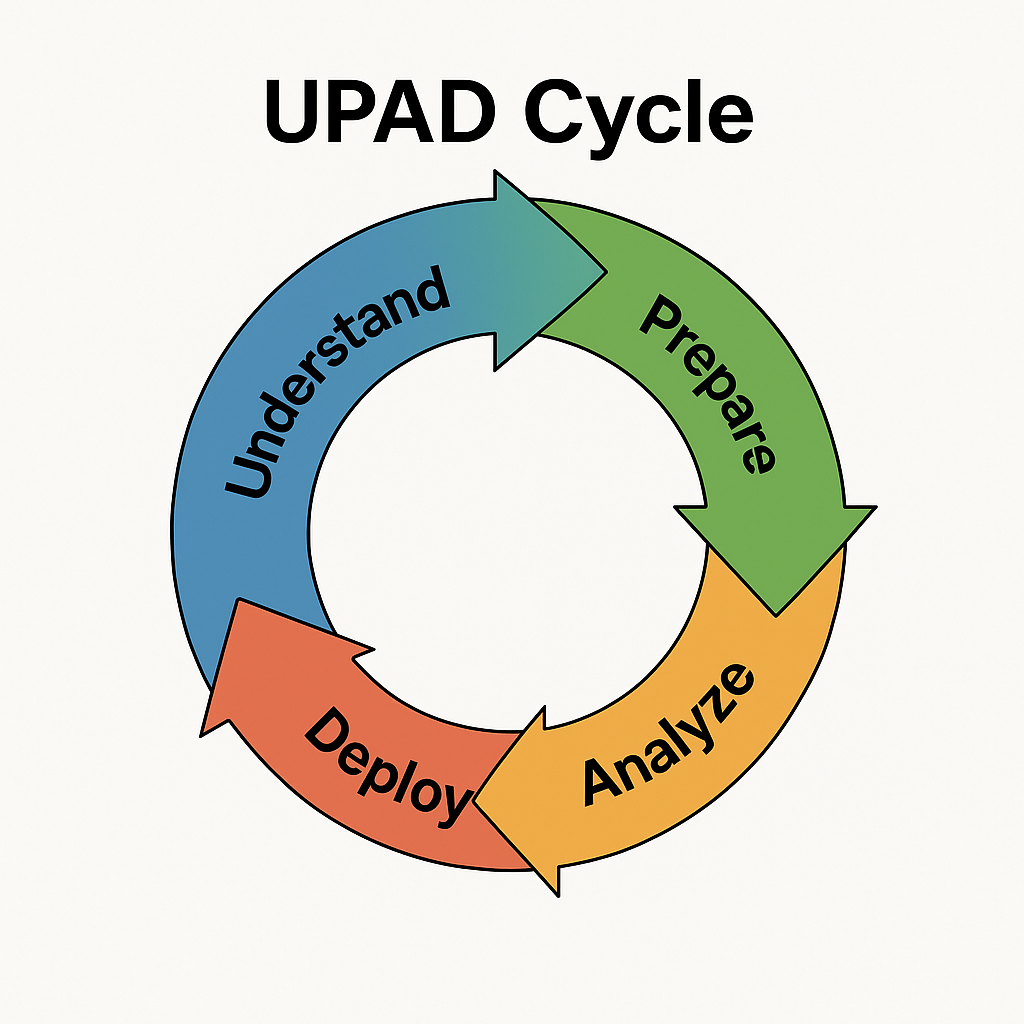

## **Understand**

The Employment Insurance Coverage Survey (EICS) primarily analyzes the accessibility and limitations of the EI program by identifying which jobless or underemployed individuals qualify for benefits. By examining specific groups—such as the long-term unemployed, recent labor market entrants, and those who haven't claimed despite eligibility—the survey provides critical data on why people remain uncovered, their job search behaviors, and their alternative income sources. Additionally, it offers comprehensive insights into maternity and parental benefits, tracking participation rates among new parents, the timing of their return to work, and the overall financial stability of households with young children.


Our goal here is to use the CEIS data to investigate whether HOURS (number of insurable hours the year before respondent stopped working) is predictive of LOOK_HRS (hours spent looking for work per week). Observation units are individuals selected from the Labour Force Survey (LFS). We'll incorporate a two-level structure, where individuals are grouped according to a random sample of INDUSTRY (Ag/Forestry = 1, Ed/Health/Social Svcs = 5, Other = 6).  

Let's import the data and get ready to prepare it for analysis.

In [2]:
import pandas as pd
df = pd.read_table('https://raw.githubusercontent.com/ksuaray/Suaray25/refs/heads/main/Teaching%20Demo/Canada_Empl_Insurance_Survey.tab')
df

,PUMFID,SRYR,REGION6,SEX,AGECAT,EDUC,TYPES,WORKNOW,PARENT,LNDIMM_G,...,CI_10A,CHGINC,STUDENT,EFAMEM_R,EFAMSZ_R,EFAMILY,LEFTLOST,RSWK,WTPM,VERDATE
0,1053,2023,6,2,3,2,3,6,0,2,...,6,99,3,0,2,4,6,96,896.5260,29/08/2024
1,1054,2023,6,2,2,5,3,1,1,2,...,1,2,3,2,3,2,3,4,796.8127,29/08/2024
2,1055,2023,6,1,1,3,3,6,0,2,...,6,99,1,1,2,6,6,96,3271.2338,29/08/2024
3,1056,2023,6,1,2,4,2,6,0,2,...,6,99,3,2,2,2,6,96,1004.6671,29/08/2024
4,1057,2023,3,2,1,2,2,6,0,2,...,6,99,1,2,4,6,6,96,3803.1744,29/08/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,8115,2023,2,2,2,5,5,1,1,2,...,1,2,3,2,3,2,6,96,511.0703,29/08/2024
7063,8116,2023,3,1,2,4,1,6,0,2,...,6,99,3,0,1,1,6,96,2975.2995,29/08/2024
7064,8117,2023,1,1,3,2,1,1,0,2,...,6,99,3,0,2,4,2,7,133.5739,29/08/2024
7065,8118,2023,1,2,2,4,3,2,1,2,...,1,4,3,2,4,2,3,4,98.6873,29/08/2024


## **Prepare**

Let's use the [codebook](https://borealisdata.ca/api/datasets/export?exporter=html&persistentId=doi:10.5683/SP3/MYZ1UV) to give our variables names we can recognize a little more easily. Use Gemini to handle this task.

In [3]:
column_remapping = {
    'PUMFID': 'PUMF_ID',
    'SRYR': 'SURVEY_YR',
    'REGION6': 'REGION',
    'SEX': 'SEX',
    'AGECAT': 'AGE_CAT',
    'EDUC': 'EDUC',
    'TYPES': 'TYPES',
    'WORKNOW': 'WORKNOW',
    'PARENT': 'PARENT',
    'LNDIMM_G': 'LND_IMM_G',
    'LSTWRK': 'LAST_WORK',
    'TENURE_G': 'TENURE_G',
    'NAICS6': 'INDUSTRY',    #Industry group the candidate identifies with
    'NOC6': 'NOC6',
    'UNIONCA': 'UNION_CA',
    'HRLYEARN': 'HRL_EARN',
    'FTPT': 'FTPT',
    'WRKTYP': 'WORK_TYPE',
    'EIDEDUC': 'EI_DEDUCT',
    'RNDEDUC': 'RND_DEDUC',
    'WEEKSCAT': 'WEEKS_CAT',
    'FTPT_RY': 'FTPT_RY',
    'CLAIM': 'CLAIM',
    'BENEFIT': 'BENEFIT',
    'BENTYP': 'BEN_TYPE',
    'BENWEEKS': 'BEN_WEEKS',
    'RNBEN': 'RN_BEN',
    'RNBENRW': 'RNBENRW',
    'HOURS': 'HOURS',     #Number of insurable hours the year before respondent stopped working
    'INSEMP': 'INS_EMP',
    'COVERAGE': 'COVERAGE',
    'ELIGIBLE': 'ELIGIBLE',
    'MATPAR': 'MAT_PAR',
    'WHYSPNCL': 'WHYSPN_CL',
    'PATCLAIM': 'PAT_CLAIM',
    'SPPARCL': 'SPPAR_CL',
    'SPCLAIM': 'SP_CLAIM',
    'BENPLAN': 'BEN_PLAN',
    'ADDPAYM': 'ADD_PAY',
    'APWEEKS': 'AP_WEEKS',
    'AF_05': 'AF_05',
    'AF_25': 'AF_25',
    'JS_05': 'JS_05',
    'LOOKHRS': 'LOOK_HRS',   #Hours spent looking for work week
    'LOOKCOST': 'LOOK_COST',
    'LOOKOUT': 'LOOKOUT',
    'CARE_G': 'CARE_G',
    'CARETYPE': 'CARE_TYPE',
    'SAMEMP': 'SAME_EMP',
    'WRKAFTER': 'WORK_AFTER',
    'EMPAGREE': 'EMP_AGREE',
    'CHLDCARE': 'CHILDCARE',
    'WORKCOND': 'WORK_COND',
    'ALLEAVE': 'ALL_LEAVE',
    'LEAVECAT': 'LEAVE_CAT',
    'CI_10A': 'CI_10A',
    'CHGINC': 'CHG_INC',
    'STUDENT': 'STUDENT',
    'EFAMEM_R': 'EFAM_EMP',
    'EFAMSZ_R': 'EFAM_SIZE',
    'EFAMILY': 'EFAMILY',
    'LEFTLOST': 'LEFT_LOST',
    'RSWK': 'RSWK',
    'WTPM': 'WTPM',
    'VERDATE': 'VER_DATE'
}

# Filter the remapping dictionary to only include columns that are present in the DataFrame
existing_columns_remapping = {old_name: new_name for old_name, new_name in column_remapping.items() if old_name in df.columns}

# Rename the columns
df = df.rename(columns=existing_columns_remapping)

# Display the first 5 rows with the new column names
display(df.head())

,PUMF_ID,SURVEY_YR,REGION,SEX,AGE_CAT,EDUC,TYPES,WORKNOW,PARENT,LND_IMM_G,...,CI_10A,CHG_INC,STUDENT,EFAM_EMP,EFAM_SIZE,EFAMILY,LEFT_LOST,RSWK,WTPM,VER_DATE
0,1053,2023,6,2,3,2,3,6,0,2,...,6,99,3,0,2,4,6,96,896.5260,29/08/2024
1,1054,2023,6,2,2,5,3,1,1,2,...,1,2,3,2,3,2,3,4,796.8127,29/08/2024
2,1055,2023,6,1,1,3,3,6,0,2,...,6,99,1,1,2,6,6,96,3271.2338,29/08/2024
3,1056,2023,6,1,2,4,2,6,0,2,...,6,99,3,2,2,2,6,96,1004.6671,29/08/2024
4,1057,2023,3,2,1,2,2,6,0,2,...,6,99,1,2,4,6,6,96,3803.1744,29/08/2024


In [4]:
CEIS = df[['HOURS','LOOK_HRS','ALL_LEAVE','INDUSTRY','FTPT','REGION','STUDENT','EFAM_EMP']]
CEIS

,HOURS,LOOK_HRS,ALL_LEAVE,INDUSTRY,FTPT,REGION,STUDENT,EFAM_EMP
0,9996,999.6,96,6,6,6,3,0
1,2080,999.6,21,5,1,6,3,2
2,9996,999.6,96,4,6,6,1,1
3,9996,999.6,96,6,2,6,3,2
4,9996,999.6,96,5,2,3,1,2
...,...,...,...,...,...,...,...,...
7062,9996,999.6,12,5,2,2,3,2
7063,9996,999.6,96,99,6,3,3,0
7064,960,999.6,96,6,1,1,3,0
7065,2600,999.6,11,5,1,1,3,2


We can see characteristics of HOURS [here](https://borealisdata.ca/api/datasets/export?exporter=html&persistentId=doi:10.5683/SP3/LUD07X#PVISMIN). Let's remove missing values.

In [5]:
CEIS_1 = CEIS[(CEIS['HOURS']>=0)&(CEIS['HOURS']<9000)]
CEIS_1

,HOURS,LOOK_HRS,ALL_LEAVE,INDUSTRY,FTPT,REGION,STUDENT,EFAM_EMP
1,2080,999.6,21,5,1,6,3,2
5,1664,999.6,96,4,1,2,3,1
7,860,999.6,96,4,2,1,3,0
8,2340,999.6,96,2,1,1,3,1
9,600,999.6,96,4,2,3,3,0
...,...,...,...,...,...,...,...,...
7058,2080,999.6,96,5,1,3,3,0
7060,3904,999.6,96,6,1,5,3,0
7064,960,999.6,96,6,1,1,3,0
7065,2600,999.6,11,5,1,1,3,2


Characteristics of LOOK_HRS [here](https://borealisdata.ca/api/datasets/export?exporter=html&persistentId=doi:10.5683/SP3/MYZ1UV#LOOKHRS). Let's remove missing values.

In [6]:
CEIS_2 = CEIS_1[(CEIS_1['LOOK_HRS']>=0)&(CEIS_1['LOOK_HRS']<900)]
CEIS_2

,HOURS,LOOK_HRS,ALL_LEAVE,INDUSTRY,FTPT,REGION,STUDENT,EFAM_EMP
11,1440,10.0,96,2,1,1,3,1
19,1872,2.0,96,2,1,3,3,1
23,2000,35.0,96,2,1,3,3,2
24,675,5.0,96,1,1,1,3,1
26,1320,10.0,96,3,1,3,3,1
...,...,...,...,...,...,...,...,...
7033,1950,2.0,96,6,1,1,3,0
7037,780,8.0,96,5,2,1,3,0
7053,2080,5.0,96,4,1,2,3,0
7057,1000,4.0,96,6,1,1,3,1


In [7]:
CEIS_3 = CEIS_2[(CEIS_2['INDUSTRY']==1)|(CEIS_2['INDUSTRY']==5)|(CEIS_2['INDUSTRY']==6)]
CEIS_3

,HOURS,LOOK_HRS,ALL_LEAVE,INDUSTRY,FTPT,REGION,STUDENT,EFAM_EMP
24,675,5.0,96,1,1,1,3,1
30,1163,4.0,96,6,1,1,3,2
73,1352,5.0,96,5,2,1,3,0
77,2656,5.0,96,1,1,4,3,1
84,1472,1.5,96,6,1,6,1,1
...,...,...,...,...,...,...,...,...
6998,1222,35.0,96,5,2,3,3,0
6999,160,4.0,96,6,2,2,3,1
7033,1950,2.0,96,6,1,1,3,0
7037,780,8.0,96,5,2,1,3,0


In [8]:
CEIS_3

,HOURS,LOOK_HRS,ALL_LEAVE,INDUSTRY,FTPT,REGION,STUDENT,EFAM_EMP
24,675,5.0,96,1,1,1,3,1
30,1163,4.0,96,6,1,1,3,2
73,1352,5.0,96,5,2,1,3,0
77,2656,5.0,96,1,1,4,3,1
84,1472,1.5,96,6,1,6,1,1
...,...,...,...,...,...,...,...,...
6998,1222,35.0,96,5,2,3,3,0
6999,160,4.0,96,6,2,2,3,1
7033,1950,2.0,96,6,1,1,3,0
7037,780,8.0,96,5,2,1,3,0


In [9]:
import plotly.express as px
px.scatter(x=CEIS_3['HOURS'],y=CEIS_3['LOOK_HRS'],color=CEIS_3['INDUSTRY'])

## **Analyze**

In [10]:
import statsmodels.formula.api as smf

# Define the linear regression model
model = smf.ols(formula='LOOK_HRS ~ HOURS', data=CEIS_3)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               LOOK_HRS   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.125
Date:                Mon, 02 Feb 2026   Prob (F-statistic):             0.0242
Time:                        05:37:41   Log-Likelihood:                -1323.4
No. Observations:                 362   AIC:                             2651.
Df Residuals:                     360   BIC:                             2659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1108      0.938      8.649      0.0

In [11]:
import statsmodels.formula.api as smf

# Define the mixed-effects model with a random intercept for 'LND_IMM_G'
# The formula 'ALL_LEAVE ~ HOURS' specifies ALL_LEAVE as the dependent variable and HOURS as a fixed effect.
# The 'groups=LND_IMM_G' argument specifies LND_IMM_G as the grouping variable for the random intercept.
model_mixed = smf.mixedlm(formula='LOOK_HRS ~ HOURS', data=CEIS_3, groups=CEIS_3['INDUSTRY'])

# Fit the mixed-effects model
results_mixed = model_mixed.fit()

# Print the summary of the regression results
print(results_mixed.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: LOOK_HRS  
No. Observations: 362     Method:             REML      
No. Groups:       3       Scale:              85.5184   
Min. group size:  42      Log-Likelihood:     -1326.1499
Max. group size:  216     Converged:          Yes       
Mean group size:  120.7                                 
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   6.807     1.728  3.939  0.000   3.420  10.194
HOURS       0.001     0.001  2.558  0.011   0.000   0.003
Group Var   5.444     0.721                              



In [12]:
print(results_mixed.random_effects)

{np.int64(1): Group   -2.065483
dtype: float64, np.int64(5): Group   -0.120407
dtype: float64, np.int64(6): Group    2.185889
dtype: float64}


The mixed-effects analysis estimates the relationship between prior insurable hours and current weekly job-search hours while allowing baseline search intensity to vary by job type (Ag/Forestry, Education/Health/Social Services, and Other). Across 362 individuals, the fixed-effect estimate for HOURS is positive and statistically significant (β ≈ 0.001, p = 0.011), indicating that individuals with greater labor-market attachment in the previous year tend to spend more time searching for work, even after accounting for job-type differences. The intercept of about 6.8 suggests that, for an individual with zero insurable hours, expected job-search time is roughly 7 hours per week on average across job types. Importantly, the random-intercept variance is substantial (Group Var ≈ 5.44), implying meaningful heterogeneity across job types in baseline job-search behavior: relative to the overall mean, Ag/Forestry is associated with lower baseline search time, Education/Health/Social Services is close to the average, and Other industries exhibit higher baseline search effort. Thus, while the HOURS effect is common across job types, where someone comes from in terms of industry materially shifts their starting level of search intensity. Let's visualize:

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Convert 'INDUSTRY' to string type for categorical coloring in Plotly Express
# This ensures consistent coloring with the scatter points
CEIS_3_plot = CEIS_3.copy()
CEIS_3_plot.loc[:, 'INDUSTRY'] = CEIS_3_plot['INDUSTRY'].astype(str)

# Generate a scatterplot with 'HOURS' on the x-axis and 'LOOK_HRS' on the y-axis.
# Use 'INDUSTRY' to color the data points.
fig = px.scatter(CEIS_3_plot, x='HOURS', y='LOOK_HRS', color='INDUSTRY')

# Get fixed effects from the mixed model
fixed_intercept = results_mixed.params['Intercept']
fixed_hours_coef = results_mixed.params['HOURS']

# Get min and max HOURS for drawing prediction lines
min_hours = CEIS_3_plot['HOURS'].min()
max_hours = CEIS_3_plot['HOURS'].max()
hours_range = np.linspace(min_hours, max_hours, 100)

# Get the default plotly colors to match the scatter plot, if possible
plotly_colors = px.colors.qualitative.Plotly

# Iterate through random effects to draw parallel lines for each industry
# The keys of results_mixed.random_effects are the original integer INDUSTRY values
for i, (industry_id, random_effect) in enumerate(results_mixed.random_effects.items()):
    # Get the random intercept adjustment for this group
    random_intercept_adjustment = random_effect.loc['Group']

    # Calculate the group-specific intercept (fixed intercept + random adjustment)
    group_intercept = fixed_intercept + random_intercept_adjustment

    # Calculate predicted LOOK_HRS for this group using the common slope and group-specific intercept
    predicted_look_hrs = group_intercept + fixed_hours_coef * hours_range

    # Add the prediction line to the figure
    fig.add_trace(go.Scatter(
        x=hours_range,
        y=predicted_look_hrs,
        mode='lines',
        name=f'Mixed Model Pred (Industry {industry_id})', # Use original integer for clarity in legend
        line=dict(color=plotly_colors[i % len(plotly_colors)], dash='dash'), # Use dashed lines for predictions
        showlegend=True
    ))

fig.update_layout(title='Scatter Plot with Mixed-Effects Model Predictions (Parallel Lines)')
fig.show()

/tmp/ipython-input-1013036437.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '6' '5' '1' '6' '6' '5' '6' '5' '5' '5' '5' '5' '5' '5' '6' '6' '5'
 '1' '6' '5' '1' '6' '6' '5' '6' '6' '6' '5' '6' '6' '6' '1' '6' '6' '6'
 '5' '6' '1' '6' '6' '6' '6' '6' '5' '5' '6' '1' '6' '6' '6' '5' '6' '6'
 '6' '6' '6' '6' '5' '6' '6' '6' '6' '6' '5' '1' '6' '6' '5' '5' '6' '6'
 '1' '1' '6' '6' '5' '6' '5' '5' '6' '6' '5' '5' '5' '5' '6' '6' '5' '6'
 '6' '5' '5' '1' '6' '6' '6' '5' '6' '6' '1' '6' '5' '6' '6' '5' '6' '5'
 '6' '6' '5' '5' '6' '5' '1' '5' '6' '6' '5' '6' '6' '5' '6' '6' '6' '6'
 '6' '5' '6' '6' '6' '1' '6' '6' '6' '1' '6' '6' '6' '6' '6' '6' '1' '6'
 '1' '6' '6' '5' '6' '6' '6' '5' '1' '1' '6' '6' '6' '6' '6' '6' '1' '6'
 '5' '1' '6' '1' '6' '6' '5' '5' '6' '6' '6' '6' '1' '5' '5' '5' '5' '6'
 '6' '6' '6' '6' '6' '5' '5' '6' '6' '6' '5' '6' '5' '6' '5' '5' '5' '6'
 '5' '6' '5' '6' '6' '5' '5' '1' '6' '6' '

## **Deploy**

In practice, these results can be used to generate more realistic predictions of how long people spend looking for work by combining individual histories with industry context. A policymaker, employment agency, or workforce analyst can start with a person’s insurable hours from the prior year to capture their attachment to the labor market, then adjust predictions based on the job type they are exiting. For example, two individuals with the same employment history will not be predicted to search equally long if one comes from Ag/Forestry and the other from an “Other” industry—the latter is expected to spend several more hours per week searching, even before accounting for HOURS. This allows forecasts and interventions (e.g., targeted job-search assistance, benefit duration planning, or retraining programs) to be tailored not just to individual work histories but also to systematic differences across industries, improving both the accuracy and policy relevance of predictions about job-search behavior.